In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as s
import seaborn as sns

np.random.seed(42)

## Atividade A

In [2]:
# Cria duas distribuições  com 9 valores, sendo que a segunda é uniforme
limit_down = 0
limit_up = 99
size = 9

x_dist = np.random.randint(low=limit_down, high=limit_up, size=size)
y_value = np.random.randint(low=limit_down, high=limit_up, size=1)
y_dist = np.repeat(y_value, size)

print(x_dist)
print(y_dist)

[51 92 14 71 60 20 82 86 74]
[74 74 74 74 74 74 74 74 74]


In [3]:
# Cria DataFrame a partir das distribuições
data = {'X': x_dist, 'Y': y_dist}
df = pd.DataFrame(data)

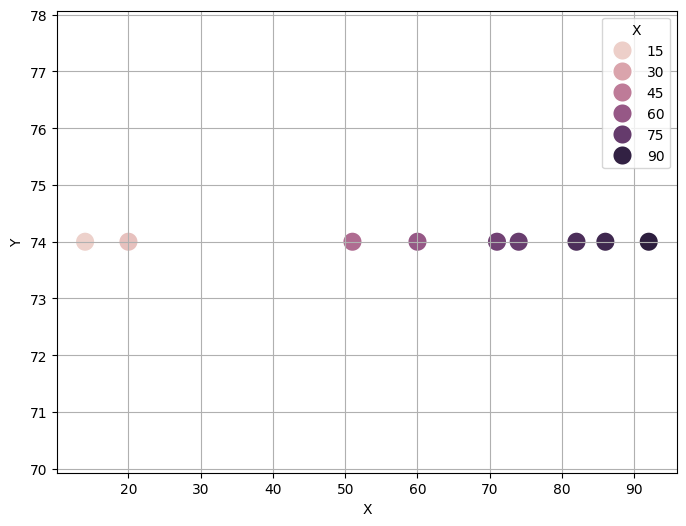

In [4]:
# Plota gráfico de dispersão das distribuições
plt.figure(figsize=(8, 6))
plt.grid(True)
sns.scatterplot(x='X', y='Y', data=df, hue=df['X'], s=200)
plt.show()

In [5]:
# Calcula linha de relação entre as distribuições
lr = s.linregress(x_dist, y_dist)

print(lr)

LinregressResult(slope=np.float64(0.0), intercept=np.float64(74.0), rvalue=0.0, pvalue=np.float64(1.0), stderr=np.float64(0.0), intercept_stderr=np.float64(0.0))


### Análise sobre a Regressão Linear e o _P-Value_

É possível averiguar que a função `s.linregress`, que calcula a regressão linear entre duas distribuições, retorna que a inclinação da reta é `0` e que o ponto de intersecção é `74`. Isso faz sentido em razão da distribuição `Y` ser uniforme justamente no valor 74, o que faz com que uma linha horizontal no ponto `74` do eixo `Y` consiga demonstrar a relação entre as duas distribuições.

Além disso, é possível conferir que o _P-value_ calculado foi `1`. Considerando que a hipótese nula diz assume que não há uma relação linear significativa entre as distribuições e, por consequência, que o _slope_ (inclinação) é `0`, pode-se dizer que o _P-value_ confirma o que foi descrito no parágrafo anterior, pois, como seu valor é alto (acima do limiar comumente usado de `0.05`), não é possível rejeitar a hipótese nula.

Tudo isso se justifica pelo comportamento constante de `Y`, já que se mantém sempre em `74` independentemente do valor de `X`, o que reafirma o que foi dito anteriormente sobre não existir relação linear entre as duas distribuições, já que o valor de `Y` não muda.

In [6]:
# Utiliza informações calculadas para montar array com os pontos da linha
line = lr.slope * x_dist + lr.intercept

print(line)

[74. 74. 74. 74. 74. 74. 74. 74. 74.]


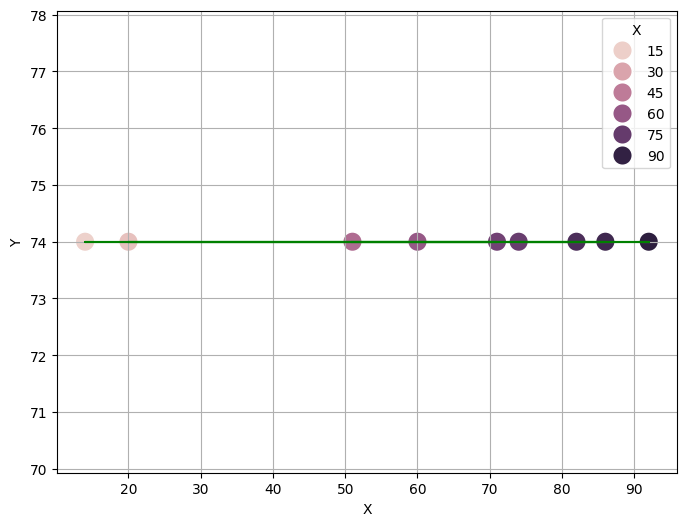

In [7]:
# Plota gráfico com a linha de relação das distribuições
plt.figure(figsize=(8, 6))
plt.grid(True)
sns.scatterplot(data=df, x='X', y='Y', hue=df['X'], s=200)
plt.plot(df['X'], line, color='green')
plt.show()

In [8]:
# Cálculo da matriz de covariância
np.cov(x_dist, y_dist)

array([[785.86111111,   0.        ],
       [  0.        ,   0.        ]])

### Análise sobre a Covariância

De acordo com a ordem do que foi passado na função `np.cov`, a covariância entre `X` e `Y` está presente nas posições `[0, 1]` e `[1, 0]`, de forma que a covariância entre as distribuiçoes é `0`.

Isso faz sentido, pois foi visto que a inclinação da regressão linear foi `0` também e, como a covariância tem a função principal de indicar o sentido de inclinação da reta, era esperado que seu valor de fato fosse `0`, mostrando que não há inclinação na reta e, por consequência, não há relação linar entre as distribuições.

Outra razão para o valor estar correto é a não variação da distribuição `Y` conforme `X` varia.

In [9]:
# Cálculo da matriz de correlação
np.corrcoef(x_dist, y_dist)

/home/gabriel/mestrado/p-value-confidence-intervals-correlation/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/gabriel/mestrado/p-value-confidence-intervals-correlation/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[ 1., nan],
       [nan, nan]])

### Análise sobre a Correlação

Analogamente à análise sobre covariância, a correlação também tem valor `0`, provando mais uma vez que não há relação linar sobre as distribuições em razão de todos os motivos descritos nas análises anteriores.